# **Histopathologic Cancer Detection**
### Identify metastatic tissue in histopathologic scans of lymph node sections

##  📚 Table of Contents 

1. Exploratory Data Analysis (EDA)

- Project Description
- Data Understanding
- Background Knowledge
- Exploring Data and Visualization

2. Model Building and Training

3. Result and Conclution
-----------------------------------------------

# 1. Exploratory Data Analysis (EDA)

## Project Description 

> That which is measured, improves. - Karl Pearson

The goal of this project is building model to identify Binary image classification problem for Histopathologic Cancer Detection. The ROC curve will be used as measurement that shows how well a classifier performs by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different decision thresholds. Model strategy is summarized by the below ROC curve: 

![Image](https://github.com/user-attachments/assets/ab2152ee-9981-4d6c-b396-5a11b7354b7c)

The area under the curve (AUC) represents the likelihood that the classifier will correctly rank a randomly chosen positive instance higher than a randomly chosen negative one. The ideal outcome is an AUC of 1 tha can be translated that the classifier correctly identifies all positive samples without any false positives.

## Data Understanding

### 1. PatchCamelyon benchmark
The PatchCamelyon benchmark is a new and challenging image classification dataset. It consists of 327.680 color images (96 x 96px) extracted from histopathologic scans of lymph node sections. Each image is annoted with a binary label indicating presence of metastatic tissue. PCam provides a new benchmark for machine learning models: bigger than CIFAR10, smaller than imagenet, trainable on a single GPU.
<br>
<br>

![Image](https://github.com/user-attachments/assets/eaaa3ea5-a913-4715-83d4-fa0490057ac5)
< Example images from PCam. Green boxes indicate tumor tissue in center region, which dictates a positive label >
<br>
<br>

The data for this competition is a slightly modified version of the PatchCamelyon (PCam) benchmark dataset (the original PCam dataset contains duplicate images due to its probabilistic sampling, however, the version presented on Kaggle does not contain duplicates).

The PatchCamelyon benchmark is a vital tool in the development and evaluation of machine learning models for digital pathology. By focusing on classifying small tissue patches, it enables researchers to develop automated systems that can assist in detecting cancer from histopathological images, which can ultimately improve early diagnosis and patient outcomes in oncology. The benchmark encourages progress in deep learning techniques for medical image analysis and contributes to the growing field of AI-assisted healthcare.

PatchCamelyon is derived from Camelyon16 and Camelyon17, which are existing datasets for breast cancer detection. The benchmark is used to evaluate machine learning models, particularly in histopathological image classification, where the goal is to determine whether a tissue patch contains cancerous cells or not.
<br>
<br>
#### 1) Dataset Features:
- Number of Images: 327,680
- Image Size: 96 x 96 pixels
- Labels: Each image is annotated with a binary label indicating the presence of metastatic tissue.

#### 2) Importance of the Benchmark:
- PCam is larger than CIFAR10 but smaller than ImageNet, designed to be trainable on a single GPU. This dataset provides a new standard for evaluating the performance of machine learning models.

#### 3) Source of the Dataset:
- PCam is derived from the Camelyon16 challenge, based on 400 whole-slide images stained with H&E.
- The slides were digitized at 40x magnification and collected from two different centers.

#### 4) Sampling Method:
- The dataset uses a probabilistic method to sample positive and negative patches.
- To avoid background patches, slides are converted to HSV, and patches with a maximum pixel saturation below 0.07 are filtered out.

#### 5) Use Cases:
- PCam can be utilized for various machine learning tasks, including breast tumor classification, image compression, and image clustering.
- This dataset plays a crucial role in assessing advancements in machine learning within the medical imaging field.
- Benchmarking:  PatchCamelyon is often used in research papers to evaluate and compare the performance of different machine learning models, especially deep learning architectures, on the same dataset.

#### 5) Importance in Medical AI:
- Pathology Automation: The PatchCamelyon benchmark plays a critical role in automating pathology by enabling models to assist pathologists in detecting and diagnosing cancer from tissue slides. This can reduce the burden on medical professionals and improve diagnostic efficiency.

- Transferability: While PatchCamelyon is focused on breast cancer, the techniques and models trained on it can be applied to other types of cancer and pathology datasets, making it an important stepping stone in the broader field of medical image analysis.

### 2. TIFF (Tagged Image File Format)

TIFF files are a high-quality image format ideal for use cases that require detailed and lossless image preservation, such as in medical imaging, professional photography, and scanning. While the file sizes can be large, the format's ability to maintain image integrity makes it the preferred choice for industries where image quality is paramount.

TIFF files are commonly used in medical imaging (e.g., histopathology, radiology, X-rays, MRI scans), as they preserve the high detail and accuracy needed for diagnosis. For instance, whole slide images (WSI) from biopsy samples are often saved in TIFF format for analysis by pathologists.

#### 1) Lossless Compression:
- TIFF files can be stored using lossless compression, meaning no image data is lost during compression. This ensures that the image retains its full quality, which is essential in fields like medical imaging or archival purposes.
- TIFF can also support lossy compression, allowing for smaller file sizes if some data loss is acceptable (e.g., JPEG compression).

#### 2) High-Quality Imaging:
- TIFF is capable of storing images with high color depth (e.g., 16 or 32 bits per channel), which allows for more detailed and accurate color representation. This makes TIFF ideal for images that require fine detail, such as scanned photographs, artwork, or satellite imagery.

#### 3) Multi-layer and Multi-page Support:
- TIFF files can store multiple layers (each containing different image data) and multi-page images, making them useful for storing things like scanned documents or multi-image datasets.
Flexibility in Color Models:
- TIFF can support a wide range of color models, such as RGB, CMYK, grayscale, and indexed colors. This flexibility makes it suitable for various use cases, including printing and medical imaging.

#### 4) Metadata Support:
- TIFF files can contain metadata (additional information about the image), such as camera settings, GPS coordinates (in the case of photos), and other technical details. This is particularly useful in professional fields where context and image data are critical.

#### 5) File Size:
- Since TIFF files often store images in high quality or without any compression, the file sizes can be quite large compared to other image formats like JPEG or PNG. This is one reason TIFF is used less in general consumer applications but more in professional environments.
 


### 3. Performance Evaluation Metrics

### 1) AUC (Area Under the Curve): 
- One of the most commonly used evaluation metrics for the PatchCamelyon benchmark is AUC, which indicates how well the model can distinguish between positive and negative classes.

### 2) Accuracy: 
- The overall accuracy of the model in correctly classifying patches is also a standard performance measure.

### 3) Precision and Recall: 
- These metrics can be useful for evaluating how well the model identifies cancerous patches (precision) and how well it detects all cancerous patches (recall).


## Background Knowledge

### Histopathological images 
<br>
Histopathological images are microscopic images of tissue samples that are used in pathology to study and diagnose diseases. These images are captured after the tissue samples are processed, stained, and examined under a microscope, typically by pathologists. 

Histopathological images help in the detailed examination of the cellular structure and tissue organization, which is essential for diagnosing various diseases, including cancers.  

Histopathological images are crucial for understanding and diagnosing diseases at the microscopic level. By examining these images, healthcare professionals can make accurate diagnoses and treatment decisions. With the integration of AI, the process of analyzing histopathological images has become faster and more reliable, improving patient outcomes and reducing diagnostic errors.

### 1) Tissue Samples:
- These images are taken from tissue biopsies or surgical specimens. The tissues are often from organs or lesions, such as tumors, and may show healthy or diseased conditions.

### 2) Staining:
- Histopathological images are usually enhanced using staining techniques (e.g., Hematoxylin and Eosin (H&E) stain), which make certain components of the cells and tissues more visible, such as nuclei, cytoplasm, and extracellular matrices. Stains help differentiate structures in the tissue, making it easier to analyze pathological changes.

### 3) Microscopic Analysis:
- These images are captured using high-powered microscopes, often requiring magnifications ranging from 100x to 1000x. This level of detail allows pathologists to closely examine the fine structures of cells, tissues, and any abnormalities that may be present.

### 4) Cellular and Tissue Changes:
- Histopathological images reveal changes at the cellular level, such as abnormal cell morphology, infiltration by immune cells, tissue necrosis (cell death), inflammation, or tumor growth. The analysis of these changes is crucial for diagnosing conditions like cancer, inflammatory diseases, infectious diseases, and other disorders.
Applications of Histopathological Images:

### 5) Cancer Diagnosis:
- One of the primary uses of histopathological images is in the diagnosis of cancer. Pathologists analyze the images to determine the type of cancer, the degree of differentiation of cancer cells, and whether cancer cells have spread (metastasized) to other parts of the body.

### 6) Disease Monitoring:
- Histopathological images are used to monitor the progression of diseases, such as inflammatory conditions or autoimmune diseases, by examining tissue damage or changes over time.

### 7) Surgical Planning and Outcome Prediction:
- These images help surgeons and oncologists in planning treatments, such as determining the extent of surgical resection needed for tumor removal. They also provide insight into how well a patient might respond to a particular treatment, based on tissue characteristics.

###  8) Role in Machine Learning and AI:
- Recent advancements in artificial intelligence (AI) and machine learning (ML) have enabled automated analysis of histopathological images. AI models can help pathologists by automatically detecting anomalies, identifying regions of interest, and classifying types of tissue or disease, thus speeding up diagnosis and improving accuracy. For example, deep learning models have been developed to detect tumors, estimate cancer stages, and even predict patient outcomes from histopathological data.

## Exploring Data and Visualization

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook
from scipy.stats import ttest_ind
import matplotlib.image as mpimg
from PIL import Image


In [2]:
# Set global seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

### Prepare dataframe

In [3]:
# Define the file path for the directory containing training images
train_tif = '/kaggle/input/histopathologic-cancer-detection/train/'

# Define the file path for the CSV file that contains the labels for the images
label_csv = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'

# Load the CSV file into a pandas DataFrame
class_labels = pd.read_csv(label_csv)

# Append the '.tif' extension to each image ID in the 'id' column
class_labels['id'] = class_labels['id'] + '.tif'

# Convert the 'label' column to a string type
class_labels['label'] = class_labels['label'].astype(str)

# Add a new column 'image_path' to the DataFrame
class_labels['image_path'] = class_labels['id'].apply(lambda x: os.path.join(train_tif, x))

In [4]:
class_labels.head()

,id,label,image_path
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0,/kaggle/input/histopathologic-cancer-detection...
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1,/kaggle/input/histopathologic-cancer-detection...
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0,/kaggle/input/histopathologic-cancer-detection...
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0,/kaggle/input/histopathologic-cancer-detection...
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0,/kaggle/input/histopathologic-cancer-detection...


### Distribution of labels in image dataframe

< Benign vs Malignant Distribution (%) >
        proportion
label            
0       59.496875
1       40.503125 

< Label Frequency (Count) >
 label
0    130908
1     89117
Name: count, dtype: int64


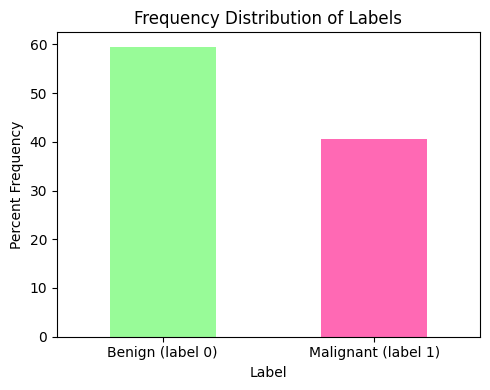

In [7]:
# Calculate frequency distribution
label_distribution = (class_labels.label.value_counts(normalize=True) * 100).to_frame()

# Plotting the frequency distribution as a bar chart
plt.figure(figsize=(5, 4))
colors = ['palegreen', 'hotpink']  # Colors for benign and malignant

# Plotting bar chart with specified colors
label_distribution.iloc[:, 0].plot(kind='bar', color=colors)

# Customizing chart
plt.title('Frequency Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Percent Frequency')
plt.xticks([0, 1], ['Benign (label 0)', 'Malignant (label 1)'], rotation=0)

# Displaying frequency distribution and counts
print("< Benign vs Malignant Distribution (%) >\n", label_distribution, "\n")
print("< Label Frequency (Count) >\n", class_labels.label.value_counts())

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

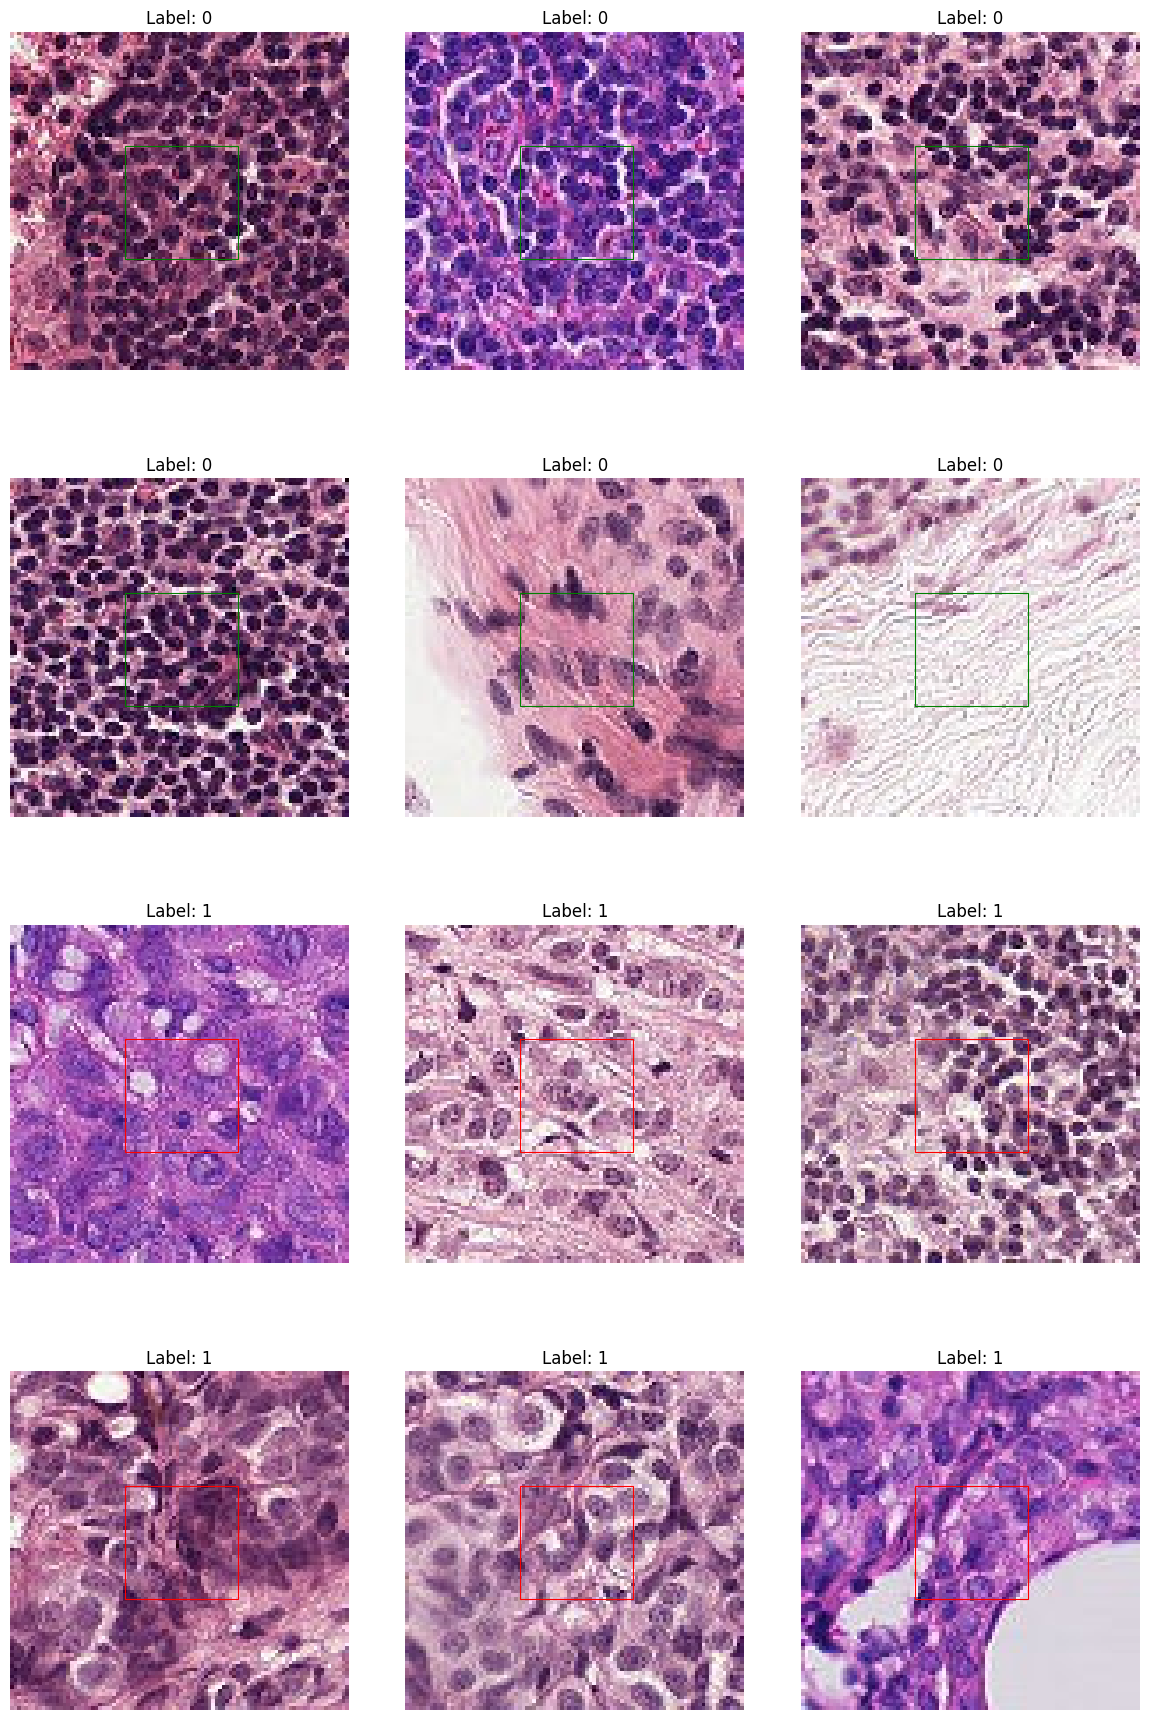

In [37]:
# Sample images with label '0' and label '1'
sample_tif_lb_0  = class_labels[class_labels['label'] == '0'].sample(6)
sample_tif_lb_1 = class_labels[class_labels['label'] == '1'].sample(6)

# Combine the samples into a single DataFrame
sample_tiff = pd.concat([sample_tif_lb_0 , sample_tif_lb_1])

# Set up the figure and axes
fig, axes = plt.subplots(4, 3, figsize=(12, 18))
fig.tight_layout(pad=1.0)

# Loop through sampled images and mark feature area.
for i, ax in enumerate(axes.flat):
    # Get the image and label
    id = sample_tiff.iloc[i]['id']
    label = sample_tiff.iloc[i]['label']
    
    # Load the image from file
    img = mpimg.imread(os.path.join(train_tif, id))

    # Display the image
    ax.imshow(img, cmap='gray')
    ax.axis('off')

    # Highlight the center 32x32 area
    h, w = img.shape[:2]
    center_x, center_y = w // 2, h // 2
    rect_x, rect_y = center_x - 16, center_y - 16

    # Correctly determine the box color based on label
    box_color = 'green' if label == '0' else 'red'

    rect = patches.Rectangle(
        (rect_x, rect_y), 32, 32,
        linewidth=0.8,
        edgecolor=box_color,
        linestyle='-',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Set title for the image
    ax.set_title(f"Label: {label}")

### Histogram of RGB channel intensities for benign or malignant

In [ ]:
# Filter DataFrame for benign and malignant samples
benign_df = full_df[full_df['label'] == '0']  # Label 0 = benign
malignant_df = full_df[full_df['label'] == '1']  # Label 1 = malignant

def load_image(image_path, target_size=(96, 96)):
    """
    Load a single image, resize it, and convert to a NumPy array.
    """
    try:
        img = Image.open(image_path)  # Load the image
        img = img.resize(target_size)  # Resize
        img_array = np.array(img)  # Convert to NumPy array
        return img_array
    except Exception as e:
        print(f"Error loading image: {image_path}")
        print(e)
        return None  # Return None if loading fails

def load_images(df, max_images=None):
    """
    Load multiple images based on a DataFrame of paths.
    """
    images = []
    for path in df['image_path'][:max_images]:
        img = load_image(path)
        if img is not None:
            images.append(img)
    return np.array(images)

# Limit the number of images to load for testing
benign_images = load_images(benign_df, max_images=100)
malignant_images = load_images(malignant_df, max_images=100)

# Check the shapes of the loaded data
print(f"Benign images shape: {benign_images.shape}")
print(f"Malignant images shape: {malignant_images.shape}")

In [ ]:
nr_of_bins = 256  # Each possible pixel value (0-255) gets a bin
fig, axs = plt.subplots(4, 2, sharey=True, figsize=(8, 8), dpi=120)  # Create a 4x2 plot grid
rgb_list = ["Red", "Green", "Blue", "RGB"]

# Loop through rows (RGB channels and combined) and columns (benign and malignant)
for row_idx in range(0, 4):
    for col_idx in range(0, 2):
        if row_idx < 3:
            axs[row_idx, 0].set_ylabel("Relative Frequency")
            axs[row_idx, 1].set_ylabel(rgb_list[row_idx], rotation="horizontal",
                                       labelpad=35, fontsize=10)
            # Plot histograms for RGB channels
            if col_idx == 0:  # Benign (label 0)
                axs[row_idx, 0].hist(benign_images[:, :, :, row_idx].flatten(),
                                     bins=nr_of_bins, density=True, color='green', alpha=0.7)
            elif col_idx == 1:  # Malignant (label 1)
                axs[row_idx, 1].hist(malignant_images[:, :, :, row_idx].flatten(),
                                     bins=nr_of_bins, density=True, color='red', alpha=0.7)
        else:
            # Plot histograms for combined RGB intensities
            if col_idx == 0:  # Benign (label 0)
                axs[row_idx, 0].hist(benign_images.flatten(),
                                     bins=nr_of_bins, density=True, color='green', alpha=0.7)
            elif col_idx == 1:  # Malignant (label 1)
                axs[row_idx, 1].hist(malignant_images.flatten(),
                                     bins=nr_of_bins, density=True, color='red', alpha=0.7)

# Add titles for columns
axs[0, 0].set_title("Benign (Label 0)")
axs[0, 1].set_title("Malignant (Label 1)")

# Show the plots
plt.tight_layout()
plt.show()

### Statistical Analysis comparing channel intensity between benign and malignant images

In [ ]:
def statistics_comparison(benign_images, malignant_images):

    stats = []
    channels = ["Red", "Green", "Blue"]
    
    for i, channel in enumerate(channels):
        # Flatten pixel intensities for the current channel
        benign_flattened = benign_images[:, :, :, i].flatten()
        malignant_flattened = malignant_images[:, :, :, i].flatten()
        
        # Calculate descriptive statistics for benign
        benign_mean = benign_flattened.mean()
        benign_median = np.median(benign_flattened)
        benign_std = benign_flattened.std()
        benign_min = benign_flattened.min()
        benign_max = benign_flattened.max()
        
        # Calculate descriptive statistics for malignant
        malignant_mean = malignant_flattened.mean()
        malignant_median = np.median(malignant_flattened)
        malignant_std = malignant_flattened.std()
        malignant_min = malignant_flattened.min()
        malignant_max = malignant_flattened.max()
        
        # Perform a two-sample t-test
        t_stat, p_value = ttest_ind(benign_flattened, malignant_flattened, equal_var=False)
        
        # Append results to the stats list
        stats.append({
            "Channel": channel,
            "Benign Mean": benign_mean,
            "Benign Median": benign_median,
            "Benign Std Dev": benign_std,
            "Malignant Mean": malignant_mean,
            "Malignant Median": malignant_median,
            "Malignant Std Dev": malignant_std,
            "t-statistic": t_stat,
            "p-value": p_value
        })
    
    # Convert stats list to a DataFrame
    return pd.DataFrame(stats)

# Compute statistics for all channels with significance
stats_comparison = statistics_comparison(benign_images, malignant_images)

# Display the statistics with t-tests
print("[Statistics and T-Test Results for Benign vs Malignant Images]\n")
print(stats_comparison)

### Interpretation of statistics and T-Test results
#### 1. Red Channel     
Benign Mean: 177.24     
Malignant Mean: 177.15     
t-statistic: 1.002253     
p-value: 0.316222     

- The means of the benign and malignant groups are very close, indicating that there is little difference in the red channel intensity between the two groups.     
- The t-statistic is low, and the p-value (0.316222) is greater than the common significance level of 0.05, suggesting that the difference is not statistically significant. This means that the red channel does not provide a reliable distinction between benign and malignant tissues.     

#### 2. Green Channel     
Benign Mean: 141.71     
Malignant Mean: 129.80     
t-statistic: 116.276410     
p-value: 0.000000     

- The benign group has a significantly higher mean intensity in the green channel compared to the malignant group.
- The t-statistic is extremely high, and the p-value is 0.000000, which is far below 0.05. This indicates a statistically significant difference between the two groups. The green channel appears to be a strong indicator for distinguishing between benign and malignant tissues, suggesting that the green channel captures important features related to tissue characteristics.

#### 3. Blue Channel     
Benign Mean: 177.61     
Malignant Mean: 177.59     
t-statistic: 0.301876     
p-value: 0.762746     

- Similar to the red channel, the means for the benign and malignant groups in the blue channel are very close, indicating little difference.     
- The t-statistic is low, and the p-value (0.762746) is much greater than 0.05, suggesting that there is no statistically significant difference between the two groups in the blue channel. Thus, the blue channel does not provide useful information for distinguishing between benign and malignant tissues.     

#### Overall Conclusion       
- The green channel is the only channel that shows a statistically significant difference between benign and malignant images, indicating that it may contain critical information for differentiating between these two types of tissues.
- The red and blue channels do not show significant differences, suggesting that they may not be as useful for classification purposes in this context.
- This analysis highlights the importance of the green channel in histopathological image analysis and suggests that further investigation into the features captured in this channel could be beneficial for improving diagnostic accuracy.
- The statistically significant difference in the green channel for histopathologic cancer detection data may be attributed to the distinct staining characteristics of benign and malignant tissues. The green channel often captures specific features related to cellular morphology and density, which can vary significantly between these tissue types, aiding in their differentiation.

### Comparision of Green channel pixel intensity

In [ ]:
# Compare Green channel pixel distributions

plt.figure(figsize=(12, 8))
plt.hist(benign_images[:, :, :, 1].flatten(), bins=50, alpha=0.4, label="Benign (Green channel)", color="lime")
plt.hist(malignant_images[:, :, :, 1].flatten(), bins=50, alpha=0.4, label="Malignant (Green channel)", color="darkgreen")
plt.title("Green Channel Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The green channel pixel intensity distributions in benign and malignant images differ significantly. This suggests that green channel intensity can be a useful feature for distinguishing between benign and malignant images.

The image displays the distribution of pixel intensities in the green channel for two classes of images: benign and malignant.

- Benign (Green Channel):  The histogram is depicted in a lighter shade of green. It shows a higher frequency of pixels with intensity values around 230-250.

- Malignant (Green Channel): The histogram is depicted in a darker shade of green. It shows a higher frequency of pixels with intensity values around 100-120.


Based on the image, it appears that there's a noticeable difference in the distribution of green channel pixel intensities between benign and malignant images.

Benign images seem to have a higher concentration of bright green pixels (higher intensity values).
Malignant images tend to have a higher concentration of darker green pixels (lower intensity values).
This suggests that the green channel could be a helpful feature for distinguishing between benign and malignant images. However, further analysis is needed to confirm this observation and assess the effectiveness of using green channel intensity for image classification.
